In [2]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#set max columns displayed to 100
pd.set_option('display.max_columns',100)

In [3]:
# First, let's import the train dataset: daily historical data from January 2013 to October 2015.

sales = pd.read_csv('./Data/competitive-data-science-predict-future-sales/sales_train.csv')

In [4]:
sales.shape

(2935849, 6)

In [5]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [7]:
# Per Kaggle documentation, the columns in this dataset are:

# shop_id - unique identifier of a shop
# item_id - unique identifier of a product
# item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
# item_price - current price of an item
# date - date in format dd/mm/yyyy
# date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33

In [8]:
# Let's convert the date column from string to datetime type

sales.date = sales.date.apply(lambda x: datetime.datetime.strptime(x, '%d.%m.%Y'))

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [10]:
# Determine if there are any null values in the dataset
sales.isnull().any()

date              False
date_block_num    False
shop_id           False
item_id           False
item_price        False
item_cnt_day      False
dtype: bool

In [11]:
# Determine if there are any duplicate rows in the dataset
sales.duplicated().any()

True

In [12]:
# Determine how many duplicate rows exists
sales.duplicated().sum()

6

In [13]:
# Drop duplicate rows
sales.drop_duplicates(inplace=True)
sales.shape

(2935843, 6)

In [14]:
# Determine the number of unique shop_id values in the dataset
len(sales.shop_id.value_counts())

60

In [15]:
# Determine the number of unique item_id values in the dataset
len(sales.item_id.value_counts())

21807

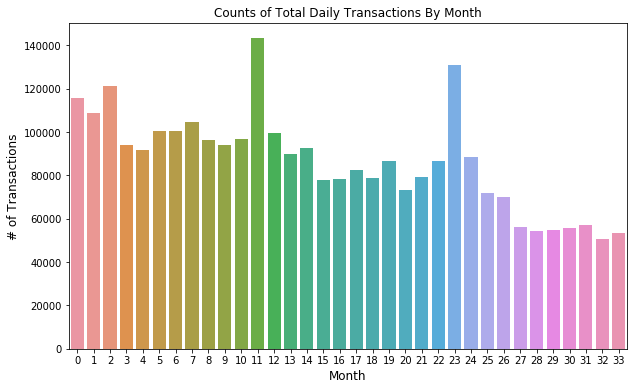

In [16]:
# Check how many total sales transactions there are in each month
monthly_sales_totals = sales.date_block_num.value_counts()
plt.figure(figsize=(10,6))
ax = sns.barplot(monthly_sales_totals.index, monthly_sales_totals.values)
plt.title("Counts of Total Daily Transactions By Month")
plt.ylabel("# of Transactions", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.show()

<b>FINDING:</b> December appears to be a high-volume month, while May appears to be a low-volume month. Other months also point to seasonality of the volume of purchases.

In [17]:
# Check distribution of month of transaction values for each shop
sales.groupby('shop_id')['date_block_num'].describe().T

shop_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,9857.000000,5678.000000,25991.000000,25532.000000,38242.000000,38179.000000,82663.000000,58076.000000,3412.000000,3751.000000,21397.000000,499.0,34694.000000,17824.000000,36979.000000,59511.000000,52734.000000,22950.000000,53227.000000,63911.000000,1792.000000,58132.000000,45434.000000,6963.000000,53032.000000,186103.000000,53910.000000,105366.000000,142234.000000,49225.000000,50860.000000,235636.000000,7947.000000,5027.000000,5752.000000,58445.000000,306.0,39638.000000,46013.000000,13440.000000,4257.000000,41967.000000,109252.000000,39282.000000,39530.000000,35891.000000,66321.000000,56695.000000,21612.000000,15849.000000,65171.000000,44433.000000,43502.000000,52921.000000,143479.000000,34769.000000,69573.000000,117428.000000,71441.000000,42108.000000
mean,0.513747,0.525537,16.691855,15.927424,14.507740,16.520574,14.063269,14.853365,0.866061,18.944548,14.182128,25.0,17.484407,8.456744,14.700533,14.258725,13.562768,14.227015,13.454600,14.484893,26.671875,16.161907,14.645134,1.455838,14.689207,15.066350,14.201428,14.513154,14.811283,12.077583,11.074479,14.935341,2.489493,22.950467,25.989221,15.249722,33.0,13.845653,15.883055,23.520833,19.662203,13.466080,16.135860,11.758133,13.824817,13.846424,14.360851,16.592927,23.830326,22.462300,12.459576,12.461166,14.641879,14.886699,11.852585,20.666513,14.301511,15.116378,15.726432,14.301320
std,0.499836,0.499391,9.547010,9.418781,9.549651,9.146677,9.330895,9.427724,0.814302,9.239632,9.400191,0.0,9.643071,5.431443,9.883468,9.416648,9.712060,5.544127,9.855083,9.548045,5.992693,9.580284,9.705284,1.104115,9.148441,9.728439,9.559257,8.786275,9.454782,8.199808,7.322799,9.544102,1.689229,1.883741,4.242381,9.494405,0.0,10.126074,9.655999,5.709685,3.279946,9.151204,9.779877,7.241830,9.341741,9.315826,9.456020,9.641717,5.209350,6.223397,8.846800,8.930045,9.437649,9.377312,7.832074,7.897850,9.329751,8.872493,8.875159,9.560465
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,9.000000,0.000000,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,18.000000,0.000000,33.0,0.000000,0.000000,14.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,2.000000,0.000000
25%,0.000000,0.000000,9.000000,8.000000,7.000000,9.000000,6.000000,7.000000,0.000000,9.000000,6.000000,25.0,10.000000,4.000000,6.000000,6.000000,5.000000,10.000000,5.000000,6.000000,21.000000,8.000000,6.000000,0.000000,7.000000,7.000000,6.000000,7.000000,7.000000,5.000000,5.000000,7.000000,1.000000,22.000000,23.000000,7.000000,33.0,4.000000,8.000000,19.000000,17.000000,6.000000,8.000000,6.000000,6.000000,6.000000,6.000000,9.000000,19.000000,17.000000,5.000000,5.000000,7.000000,7.000000,5.000000,15.000000,6.000000,7.000000,8.000000,6.000000
50%,1.000000,1.000000,17.000000,16.000000,14.000000,16.000000,13.000000,14.000000,1.000000,21.000000,13.000000,25.0,18.000000,8.000000,14.000000,13.000000,12.000000,14.000000,11.000000,13.000000,21.000000,16.000000,13.000000,1.000000,13.000000,14.000000,13.000000,14.000000,14.000000,11.000000,11.000000,14.000000,2.000000,23.000000,26.000000,14.000000,33.0,12.000000,16.000000,23.000000,20.000000,12.000000,16.000000,11.000000,13.000000,12.000000,13.000000,17.000000,23.000000,23.000000,11.000000,11.000000,14.000000,14.000000,11.000000,22.000000,13.000000,14.000000,15.000000,13.000000
75%,1.000000,1.000000,24.000000,24.000000,23.000000,24.000000,22.000000,23.000000,2.000000,21.000000,22.000000,25.0,25.000000,13.000000,23.000000,22.000000,22.000000,19.000000,22.000000,23.000000,33.000000,24.000000,23.000000,2.000000,22.000000,23.0000

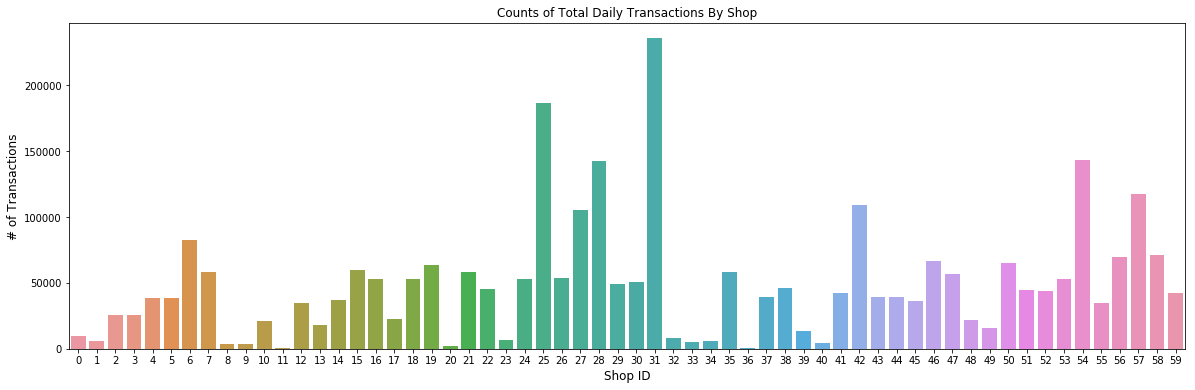

In [18]:
# Visualize differences in total transaction counts across all shops
shop_tx_cts = sales.groupby('shop_id').size()
plt.figure(figsize=(20,6))
ax = sns.barplot(shop_tx_cts.index, shop_tx_cts.values)
plt.title("Counts of Total Daily Transactions By Shop")
plt.ylabel("# of Transactions", fontsize=12)
plt.xlabel("Shop ID", fontsize=12)
plt.show()

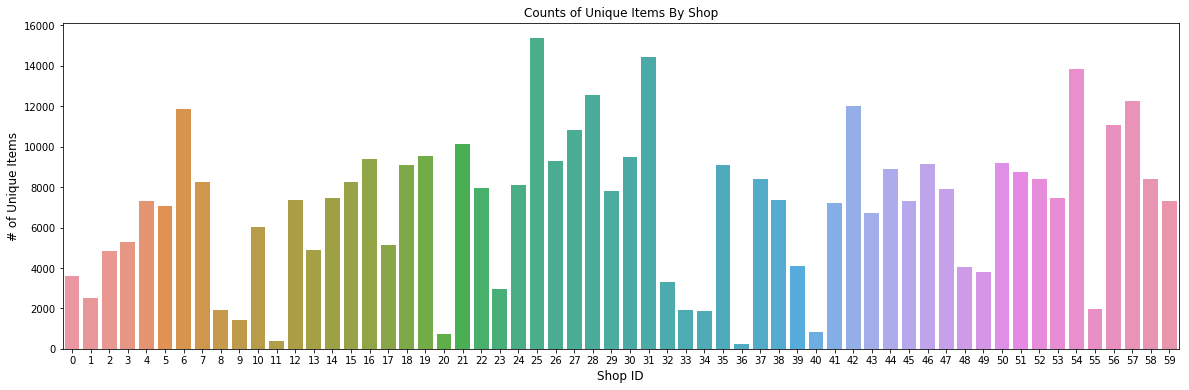

In [19]:
# Check the distribution of the number of unique items per shop
unique_items_by_shop = sales.groupby('shop_id')['item_id'].unique()
unique_item_cts_by_shop = unique_items_by_shop.map(len)
plt.figure(figsize=(20,6))
ax = sns.barplot(unique_item_cts_by_shop.index, unique_item_cts_by_shop.values)
plt.title("Counts of Unique Items By Shop")
plt.ylabel("# of Unique Items", fontsize=12)
plt.xlabel("Shop ID", fontsize=12)
plt.show()

In [20]:
# Check if there are changes in prices for same item
prices_by_item = sales.groupby('item_id')['item_price'].agg(['min','max']).reset_index()
prices_by_item.head(10)

,item_id,min,max
0,0,58.0,58.0
1,1,4490.0,4490.0
2,2,58.0,58.0
3,3,58.0,100.0
4,4,58.0,58.0
5,5,28.0,28.0
6,6,100.0,100.0
7,7,28.0,28.0
8,8,58.0,58.0
9,9,58.0,58.0


In [21]:
prices_by_item['price_changed'] = (prices_by_item['min'] != prices_by_item['max'])
prices_by_item.price_changed.value_counts()

True     15881
False     5926
Name: price_changed, dtype: int64

**FINDING:** About three-quarters of all items had different prices in the dataset.

In [22]:
prices_by_item.head(10)

,item_id,min,max,price_changed
0,0,58.0,58.0,False
1,1,4490.0,4490.0,False
2,2,58.0,58.0,False
3,3,58.0,100.0,True
4,4,58.0,58.0,False
5,5,28.0,28.0,False
6,6,100.0,100.0,False
7,7,28.0,28.0,False
8,8,58.0,58.0,False
9,9,58.0,58.0,False


In [34]:
# Determine if prices are always the same for one item on the same day, or if they vary by shop (and/or within one shop on same day)
prices_by_date_item = sales.groupby(['date','item_id'])['item_price'].agg(['min','max'])

In [35]:
prices_by_date_item.reset_index(inplace=True)
prices_by_date_item['diff_prices'] = (prices_by_date_item['min'] != prices_by_date_item['max'])
prices_by_date_item.head(10)

,date,item_id,min,max,diff_prices
0,2013-01-01,32,348.44,349.0,True
1,2013-01-01,33,499.00,499.0,False
2,2013-01-01,53,170.00,170.0,False
3,2013-01-01,59,110.00,249.0,True
4,2013-01-01,85,299.00,299.0,False
5,2013-01-01,98,268.00,399.0,True
6,2013-01-01,133,249.00,249.0,False
7,2013-01-01,154,299.00,299.0,False
8,2013-01-01,155,299.00,299.0,False
9,2013-01-01,354,258.00,258.0,False


In [36]:
prices_by_date_item.diff_prices.value_counts()

False    1426510
True      115104
Name: diff_prices, dtype: int64

**FINDING:** About 7.5% of date-item combinations show different prices.

In [28]:
prices_by_date_item_shop = sales.groupby(['date','item_id','shop_id'])['item_price'].agg(['min','max']).reset_index()

In [29]:
prices_by_date_item_shop.head()

,date,item_id,shop_id,min,max
0,2013-01-01,32,27,349.00,349.00
1,2013-01-01,32,28,349.00,349.00
2,2013-01-01,32,38,349.00,349.00
3,2013-01-01,32,42,348.44,348.44
4,2013-01-01,32,46,349.00,349.00


In [30]:
prices_by_date_item_shop['diff_prices'] = (prices_by_date_item_shop['min'] != prices_by_date_item_shop['max'])
prices_by_date_item_shop.diff_prices.value_counts()

False    2935799
True          22
Name: diff_prices, dtype: int64

<b>FINDING:</b> Based on the counts above, and the total number of rows in the sales dataset (2,935,843), there are 22 occasions when two different prices were used for same item in the same shop on the same day. On all other occasions, the same price was used in one shop for one item on the same day.

In [12]:
# Aggregate to monthly level the required metrics
monthly_sales=sales.groupby(["date_block_num","shop_id","item_id"])[
    "date","item_price","item_cnt_day"].agg({"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})

monthly_sales.head(20)

date            item_price item_cnt_day
                                      min        max       mean          sum
date_block_num shop_id item_id                                              
0              0       32      2013-01-03 2013-01-31      221.0          6.0
                       33      2013-01-03 2013-01-28      347.0          3.0
                       35      2013-01-31 2013-01-31      247.0          1.0
                       43      2013-01-31 2013-01-31      221.0          1.0
                       51      2013-01-13 2013-01-31      128.5          2.0
                       61      2013-01-10 2013-01-10      195.0          1.0
                       75      2013-01-17 2013-01-17       76.0          1.0
                       88      2013-01-16 2013-01-16       76.0          1.0
                       95      2013-01-06 2013-01-06      193.0          1.0
                       96      2013-01-10 2013-01-10       70.0          1.0
                       98      2013-01-04 2013-01-31      268.0         25.0
                       111     2013-01-17 2013-01-17       89.0          1.0
                       149     2013-01-11 2013-01-28       99.0          3.0
                       151     2013-01-16 2013-01-16       75.0          1.0
                       153     2013-01-09 2013-01-09      258.0          1.0
                       198     2013-01-10 2013-01-10      112.0          1.0
                       210     2013-01-05 2013-01-25      118.0          2.0
                       282     2013-01-04 2013-01-04      109.0          1.0
                       306     2013-01-22 2013-01-22       59.0          1.0
                       351     2013-01-21 2013-01-21       89.0          1.0